# ASSIGNMENT-2
Jhaveri Aditya Alok - 2018A7PS0209H
Mihir Bansal - 2018A7PS0215H
Aditya Agarwal - 2017B1A71075H

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
data = pd.read_csv('insurance.txt')
data.columns = ['age','bmi','children','charges']

def normalize(dataset):
    dataNorm=((dataset-dataset.mean())/(dataset.std()))
    return dataNorm

In [3]:
def testaccuracy(w,y,x_test):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x_test @ w
    error = (y_pred - y)**2
    cost = (1/(2*n)) * sum(error)
    return cost

# Solving Normal Equations

In [4]:
def init(data):
    df = normalize(data)
    df.insert(0,'Nothing',1)
    x = np.array(df.drop(['charges'],1))
    y = np.array(df['charges'])
    train, test = np.split(df.sample(frac=1).reset_index(drop=True),[int(.7*len(df))])
    y_train = np.array(train.iloc[:,4])
    x_train = np.array(train.iloc[:,0:4])
    y_test = np.array(test.iloc[:,4])
    x_test = np.array(test.iloc[:,0:4])
    return x_train,x_test,y_train,y_test

In [5]:
def solvenormal(x_train,y_train):
    b=y_train
    b=b.reshape(b.shape[0],1)
    c=x_train.transpose() @ x_train
    c = np.linalg.inv(c) 
    c=c @ x_train.transpose()
    c=c @ b
    return c

In [6]:
finalerrors =[]
mintx=100000000000000
for i in range(1,21):
    print("For the",i,"th model:")
    x_train,x_test,y_train,y_test=init(data)
    w = solvenormal(x_train,y_train)
    print("The final w by solving normal equations:\n",w)
    trainerr=testaccuracy(w,y_train,x_train)
    print("Training error:",trainerr)
    currerror=testaccuracy(w,y_test,x_test)
    print("Testing error:",currerror)
    finalerrors.append(currerror)
    mintx=min(mintx,trainerr)
    print("------------------------------------------------------------")

For the 1 th model:
The final w by solving normal equations:
 [[-0.01012934]
 [ 0.25550825]
 [ 0.12689108]
 [ 0.05496338]]
Training error: [0.42577752]
Testing error: [0.47594086]
------------------------------------------------------------
For the 2 th model:
The final w by solving normal equations:
 [[0.01368201]
 [0.27787383]
 [0.19470278]
 [0.06767319]]
Training error: [0.43780493]
Testing error: [0.4457389]
------------------------------------------------------------
For the 3 th model:
The final w by solving normal equations:
 [[0.00267208]
 [0.27637198]
 [0.18775713]
 [0.0585822 ]]
Training error: [0.44994013]
Testing error: [0.41633949]
------------------------------------------------------------
For the 4 th model:
The final w by solving normal equations:
 [[-0.01834118]
 [ 0.28158569]
 [ 0.15731737]
 [ 0.049725  ]]
Training error: [0.43507759]
Testing error: [0.45096239]
------------------------------------------------------------
For the 5 th model:
The final w by solving no

In [7]:
finalerr = DataFrame (finalerrors,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of prediction errors of 20 models is:",mean[0]) 
print("Variance of prediction errors of 20 models is:",var[0])
print("Minimum training error of 20 models is:",mintx[0])
print("Minimum prediction error of 20 models is:",minx[0])

Mean of prediction errors of 20 models is: 0.44839940507338794
Variance of prediction errors of 20 models is: 0.0008586145593051145
Minimum training error of 20 models is: 0.4125124429168619
Minimum prediction error of 20 models is: 0.38179246928818916


# Gradient Descent

In [8]:
def initialize(data):    
    df = normalize(data)
    df.insert(0,'Nothing',1)
    x = np.array(df.drop(['charges'],1))
    y = np.array(df['charges'])
    train, test = np.split(df.sample(frac=1).reset_index(drop=True),[int(.7*len(df))])
    y_train = np.array(train.iloc[:,4])
    x_train = np.array(train.iloc[:,0:4])
    y_test = np.array(test.iloc[:,4])
    x_test = np.array(test.iloc[:,0:4])
    #initializing weights
    initial_w = np.random.rand(4,1)
    #uniform sample points from uniform distribution over [0,1)
    return x_train,x_test,y_train,y_test,initial_w

In [9]:
#learning rate
global learnRate
learnRate = 0.1
flag = 0

def CostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    y_pred = x @ w
    error = (y_pred - y)**2
    cost = (1/(2*n)) * sum(error)
    grad = 1/n * (x.transpose() @ (y_pred - y))[0:]
    return cost, grad

def gradientDescent(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        cost, grad = CostFunction(w,x,y)
        w = w - (learnRate * grad)
        it=it+1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)    
        if it==epochs or (it>2 and Error_history[-1]-cost<=pow(10,-7)):
            print("No of iterations:",it)    
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)

In [10]:
learnRate = 0.01
print("2.Gradient Descent")
finalerrors =[]
mintx=100000000000000
for i in range(1,21):
    print("For the",i,"th Regression model:")
    x_train,x_test,y_train,y_test,initial_w=initialize(data)
    trainerr,w,Error_history = gradientDescent(initial_w,x_train,y_train,10000)
    print("The final w using Gradient Descent:\n",w)
    currerror=testaccuracy(w,y_test,x_test)
    print("Testing Accuracy:",currerror)
    finalerrors.append(currerror)
    mintx=min(mintx,trainerr)
    print("------------------------------------------------------------")

2.Gradient Descent
For the 1 th Regression model:
No of iterations: 50
Training error: [0.49911278]
No of iterations: 100
Training error: [0.4682472]
No of iterations: 150
Training error: [0.45652025]
No of iterations: 200
Training error: [0.4520291]
No of iterations: 250
Training error: [0.45029613]
No of iterations: 300
Training error: [0.44962276]
No of iterations: 350
Training error: [0.44935944]
No of iterations: 400
Training error: [0.44925588]
No of iterations: 450
Training error: [0.44921493]
No of iterations: 500
Training error: [0.44919867]
No of iterations: 538
Training error: [0.44919325]
The final w using Gradient Descent:
 [[0.00304564]
 [0.28193335]
 [0.1751505 ]
 [0.05418016]]
Testing Accuracy: [0.41748759]
------------------------------------------------------------
For the 2 th Regression model:
No of iterations: 50
Training error: [0.50085243]
No of iterations: 100
Training error: [0.46244397]
No of iterations: 150
Training error: [0.44847136]
No of iterations: 200
T

Testing Accuracy: [0.47586044]
------------------------------------------------------------
For the 12 th Regression model:
No of iterations: 50
Training error: [0.57746343]
No of iterations: 100
Training error: [0.49276438]
No of iterations: 150
Training error: [0.4644423]
No of iterations: 200
Training error: [0.45488341]
No of iterations: 250
Training error: [0.45162456]
No of iterations: 300
Training error: [0.45050153]
No of iterations: 350
Training error: [0.45011012]
No of iterations: 400
Training error: [0.44997211]
No of iterations: 450
Training error: [0.44992286]
No of iterations: 500
Training error: [0.44990507]
No of iterations: 537
Training error: [0.4498997]
The final w using Gradient Descent:
 [[0.00675809]
 [0.27892691]
 [0.18458575]
 [0.05777085]]
Testing Accuracy: [0.41629914]
------------------------------------------------------------
For the 13 th Regression model:
No of iterations: 50
Training error: [0.77363016]
No of iterations: 100
Training error: [0.54828187]

In [11]:
finalerr = DataFrame (finalerrors,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of prediction errors of 20 models is:",mean[0]) 
print("Variance of prediction errors of 20 models is:",var[0])
print("Minimum training error of 20 models is:",mintx[0])
print("Minimum prediction error of 20 models is:",minx[0]) 

Mean of prediction errors of 20 models is: 0.4432719593108322
Variance of prediction errors of 20 models is: 0.0012237845605785676
Minimum training error of 20 models is: 0.4204353624664996
Minimum prediction error of 20 models is: 0.36734908379957065


### Learning Rate comparison

No of iterations: 68
Training error: [0.40594866]
The final w using Gradient Descent with LR=0.1:
 [[-0.02122122]
 [ 0.26570563]
 [ 0.14740995]
 [ 0.0564764 ]]
Training error: [0.40594866]
Testing error: [0.51979332]


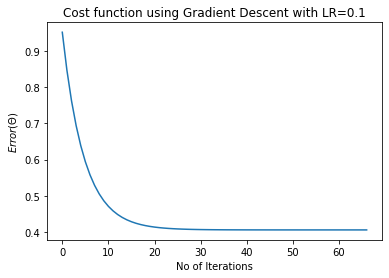

No of iterations: 600
Training error: [0.44180612]
The final w using Gradient Descent with LR=0.01:
 [[0.00031125]
 [0.26479827]
 [0.16040697]
 [0.02871475]]
Training error: [0.44180612]
Testing error: [0.43608052]


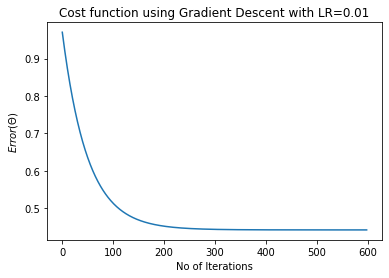

No of iterations: 4345
Training error: [0.43960684]
The final w using Gradient Descent with LR=0.001:
 [[-0.00670562]
 [ 0.3051873 ]
 [ 0.15442101]
 [ 0.07310946]]
Training error: [0.43960684]
Testing error: [0.44173696]


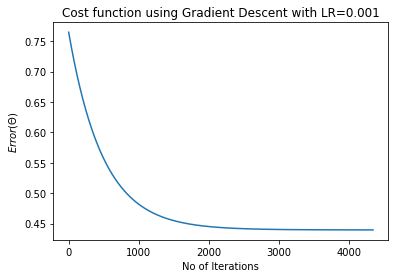

------------------------------------------------------------


In [12]:
flag=1
learnRate = 0.1
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_history = gradientDescent(initial_w,x_train,y_train,10000)
print("The final w using Gradient Descent with LR=0.1:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
plt.plot(Error_history)
plt.xlabel("No of Iterations")
plt.ylabel("$Error(\Theta)$")
plt.title("Cost function using Gradient Descent with LR=0.1")
plt.show()

learnRate = 0.01
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_history = gradientDescent(initial_w,x_train,y_train,10000)
print("The final w using Gradient Descent with LR=0.01:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
plt.plot(Error_history)
plt.xlabel("No of Iterations")
plt.ylabel("$Error(\Theta)$")
plt.title("Cost function using Gradient Descent with LR=0.01")
plt.show()

learnRate = 0.001
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_history = gradientDescent(initial_w,x_train,y_train,10000)
print("The final w using Gradient Descent with LR=0.001:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
plt.plot(Error_history)
plt.xlabel("No of Iterations")
plt.ylabel("$Error(\Theta)$")
plt.title("Cost function using Gradient Descent with LR=0.001")
plt.show()

print("------------------------------------------------------------")

# Stochastic Gradient Descent

In [13]:
def SCostFunction(w, x, y):
    n=len(y)
    y=y[:,np.newaxis]
    i=np.random.choice(np.arange(len(y)))
    x1=x[i]
    x1=x1.reshape(1,4)
    y_pred = x1 @ w
    x1=x1.reshape(4,1)
    y1=y_pred-y[i]
    grad = (x1 @ y1)
    return grad

def SgradientDescent(w,x,y):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        grad = SCostFunction(w,x,y)
        cost = testaccuracy(w,y,x)
        w = w - (learnRate * grad)
        it=it+1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)    
        if it==10000  or (it>100 and Error_history[-1]-cost<=pow(10,-7)):
            print("No of iterations:",it)    
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)

In [14]:
print("3.Stochastic Gradient Descent")
learnRate = 0.01
finalerrors =[]
flag=0
mintx=100000000000000
for i in range(1,21):
    print("For the",i,"th Regression model:")
    x_train,x_test,y_train,y_test,initial_w=initialize(data)
    trainerr,w,Error_history = SgradientDescent(initial_w,x_train,y_train)
    print("The final w using Stochastic Gradient Descent:\n",w)
    currerror=testaccuracy(w,y_test,x_test)
    print("Testing error:",currerror)
    finalerrors.append(currerror)
    mintx=min(mintx,trainerr)
    print("------------------------------------------------------------") 

3.Stochastic Gradient Descent
For the 1 th Regression model:
No of iterations: 50
Training error: [0.64128304]
No of iterations: 100
Training error: [0.59164889]
No of iterations: 102
Training error: [0.5933453]
The final w using Stochastic Gradient Descent:
 [[0.2737556 ]
 [0.43472867]
 [0.33086106]
 [0.44792374]]
Testing error: [0.59846361]
------------------------------------------------------------
For the 2 th Regression model:
No of iterations: 50
Training error: [0.44678582]
No of iterations: 100
Training error: [0.4314991]
No of iterations: 105
Training error: [0.4278282]
The final w using Stochastic Gradient Descent:
 [[0.05631234]
 [0.17097799]
 [0.09383018]
 [0.06526614]]
Testing error: [0.50335183]
------------------------------------------------------------
For the 3 th Regression model:
No of iterations: 50
Training error: [0.58056078]
No of iterations: 100
Training error: [0.51216672]
No of iterations: 101
Training error: [0.5220631]
The final w using Stochastic Gradient

In [15]:
finalerr = DataFrame (finalerrors,columns=[''])
mean=finalerr.mean()
var=(finalerr.std())**2
minx=finalerr.min()
print("Mean of prediction errors of 20 models is:",mean[0]) 
print("Variance of prediction errors of 20 models is:",var[0])
print("Minimum training error of 20 models is:",mintx[0])
print("Minimum prediction error of 20 models is:",minx[0])

Mean of prediction errors of 20 models is: 0.5020885765669314
Variance of prediction errors of 20 models is: 0.0023001393248292005
Minimum training error of 20 models is: 0.4278282028223358
Minimum prediction error of 20 models is: 0.42840560936045036


### Learning Rate comparison

No of iterations: 101
Training error: [0.43792852]
The final w using Stochastic Gradient Descent with LR=0.1:
 [[-0.03694133]
 [ 0.18824997]
 [ 0.15867751]
 [-0.03735139]]
Training error: [0.43792852]
Testing error: [0.45901666]


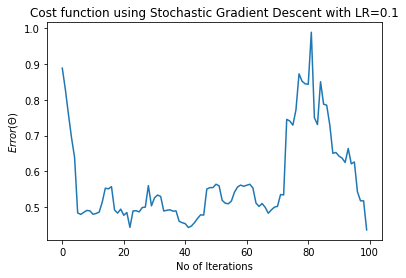

No of iterations: 103
Training error: [0.65238888]
The final w using Stochastic Gradient Descent with LR=0.01:
 [[0.44024906]
 [0.15028712]
 [0.61110376]
 [0.07006526]]
Training error: [0.65238888]
Testing error: [0.61509661]


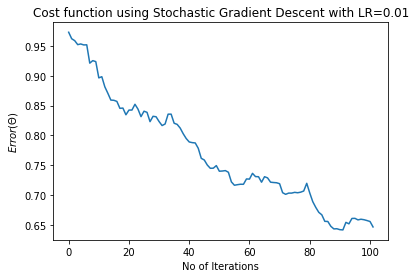

No of iterations: 102
Training error: [0.90549756]
The final w using Stochastic Gradient Descent with LR=0.001:
 [[0.26152752]
 [0.87578259]
 [0.42804879]
 [0.63840984]]
Training error: [0.90549756]
Testing error: [0.85660715]


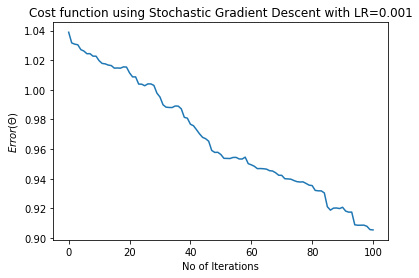

------------------------------------------------------------


In [16]:
learnRate = 0.1
flag=1
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_hist = SgradientDescent(initial_w,x_train,y_train)
print("The final w using Stochastic Gradient Descent with LR=0.1:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
plt.plot(Error_hist)
plt.xlabel("No of Iterations")
plt.ylabel("$Error(\Theta)$")
plt.title("Cost function using Stochastic Gradient Descent with LR=0.1")
plt.show()

learnRate = 0.01
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_history = SgradientDescent(initial_w,x_train,y_train)
print("The final w using Stochastic Gradient Descent with LR=0.01:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
plt.plot(Error_history)
plt.xlabel("No of Iterations")
plt.ylabel("$Error(\Theta)$")
plt.title("Cost function using Stochastic Gradient Descent with LR=0.01")
plt.show()

learnRate = 0.001
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_history = SgradientDescent(initial_w,x_train,y_train)
print("The final w using Stochastic Gradient Descent with LR=0.001:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
plt.plot(Error_history)
plt.xlabel("No of Iterations")
plt.ylabel("$Error(\Theta)$")
plt.title("Cost function using Stochastic Gradient Descent with LR=0.001")
plt.show()

print("------------------------------------------------------------")

# NORMAL VS GD VS SGD

In [17]:
import time
print("Normal")
t0=time.time()
x_train,x_test,y_train,y_test=init(data)
w = solvenormal(x_train,y_train)
t1=time.time()-t0
print("The final w by solving normal equations:\n",w)
trainerr=testaccuracy(w,y_train,x_train)
print("Training error:",trainerr)
currerror=testaccuracy(w,y_test,x_test)
print("Testing error:",currerror)
print("Time taken:",t1)

Normal
The final w by solving normal equations:
 [[-0.00545835]
 [ 0.26806845]
 [ 0.18649641]
 [ 0.06406568]]
Training error: [0.44952136]
Testing error: [0.41750709]
Time taken: 0.00931859016418457


In [18]:
print("GD")
learnRate = 0.01
t0=time.time()
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_history = gradientDescent(initial_w,x_train,y_train,10000)
t1=time.time()-t0
print("The final w using Gradient Descent with LR=0.01:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
print("Time taken:",t1)

GD
No of iterations: 567
Training error: [0.43615715]
The final w using Gradient Descent with LR=0.01:
 [[-0.00832124]
 [ 0.2517014 ]
 [ 0.17957637]
 [ 0.04823093]]
Training error: [0.43615715]
Testing error: [0.44920273]
Time taken: 0.3326907157897949


In [19]:
print("SGD")
t0=time.time()
x_train,x_test,y_train,y_test,initial_w=initialize(data)
trainerr,w,Error_history = SgradientDescent(initial_w,x_train,y_train)
t1=time.time()-t0
print("The final w using Stochastic Gradient Descent with LR=0.01:\n",w)
currerror=testaccuracy(w,y_test,x_test)
print("Testing error:",currerror)
print("Time taken:",t1)

SGD
No of iterations: 101
Training error: [0.46996762]
The final w using Stochastic Gradient Descent with LR=0.01:
 [[-0.05635491]
 [ 0.51466737]
 [ 0.13821076]
 [ 0.21386092]]
Testing error: [0.51134671]
Time taken: 0.08860301971435547


In [20]:
#w0=0
def initia(data):
    df = normalize(data)
    x = np.array(df.drop(['charges'],1))
    y = np.array(df['charges'])
    train, test = np.split(df.sample(frac=1).reset_index(drop=True),[int(.7*len(df))])
    y_train = np.array(train.iloc[:,3])
    x_train = np.array(train.iloc[:,0:3])
    y_test = np.array(test.iloc[:,3])
    x_test = np.array(test.iloc[:,0:3])
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test=initia(data)
w = solvenormal(x_train,y_train)
print("The final w by solving normal equations:\n",w)
trainerr=testaccuracy(w,y_train,x_train)
print("Training error:",trainerr)
currerror=testaccuracy(w,y_test,x_test)
print("Testing error:",currerror)

The final w by solving normal equations:
 [[0.27357385]
 [0.19173434]
 [0.07242895]]
Training error: [0.43607074]
Testing error: [0.44945465]


In [21]:
#LR=2
learnRate = 2
t0=time.time()
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_history = gradientDescent(initial_w,x_train,y_train,10000)
t1=time.time()-t0
print("The final w using Gradient Descent with LR=2:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
print("Time taken:",t1)

No of iterations: 3
Training error: [2.18416206]
The final w using Gradient Descent with LR=2:
 [[-0.8913023 ]
 [-1.04811897]
 [-0.99769877]
 [-0.58898721]]
Training error: [2.18416206]
Testing error: [2.76646714]
Time taken: 0.011012554168701172


In [32]:
#higher epochs

def gradientDescent2(w,x,y,epochs):
    n=len(y)
    it=0
    Error_history =[]
    while True:
        cost, grad = CostFunction(w,x,y)
        w = w - (learnRate * grad)
        it=it+1
        if it%50 == 0 and flag==0:
            print("No of iterations:",it)
            print("Training error:",cost)    
        if it==epochs:
            print("No of iterations:",it)    
            print("Training error:",cost)
            return cost,w,Error_history
        Error_history.append(cost)
learnRate = 0.01
t0=time.time()
x_train,x_test,y_train,y_test,initial_w=initialize(data)
t,w,Error_history = gradientDescent2(initial_w,x_train,y_train,100000)
t1=time.time()-t0
print("The final w using Gradient Descent with LR=0.01:\n",w)
print("Training error:",t)
print("Testing error:",testaccuracy(w,y_test,x_test))
print("Time taken:",t1)

No of iterations: 100000
Training error: [0.4746575]
The final w using Gradient Descent with LR=0.01:
 [[0.04171762]
 [0.30428914]
 [0.20030799]
 [0.0824183 ]]
Training error: [0.4746575]
Testing error: [0.36566796]
Time taken: 49.84536004066467
